In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
df = pd.read_csv('eda_data.csv')

In [4]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Age', 'python_yn', 'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [5]:
# choose relevant colums for model
df_model = df[['Rating','Location', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Age', 'python_yn', 
               'sql_yn', 'tableau_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len']]

In [6]:
# get dummy data
df_dum = pd.get_dummies(df_model)

In [7]:
# train test split
from sklearn.model_selection import train_test_split

X = df_dum.drop('Rating', axis =1)
y = df_dum.Rating.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# multiple linear regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

C:\Users\khairie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     80.99
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          3.84e-240
Time:                        04:31:34   Log-Likelihood:                 261.23
No. Observations:                 611   AIC:                            -388.5
Df Residuals:                     544   BIC:                            -92.64
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                 0.9972      0.122      8.199      0.000       0.758       1.236
Founded                                               0.0007   6.93e-05     10.487      0.000       0.001       0.001
Age                                                   0.0004      0.002      0.230      0.818      -0.003       0.004
python_yn                                            -0.0075      0.049     -0.154      0.877      -0.104       0.089
sql_yn                                               -0.0332      0.058     -0.570      0.569      -0.148       0.081
tableau_yn                                            0.0619      0.059      1.054      0.292      -0.053       0.177
spark_yn                                             -0.2668      0.070     -3.797      0.000      -0.405      -0.129
aws_yn                                               -0.0137      0.035     -0.391      0.696      -0.083       0.055
excel_yn                                             -0.0948      0.047     -2.001      0.046      -0.188      -0.002
desc_len                                          -1.639e-05   3.54e-05     -0.463      0.643   -8.59e-05    5.31e-05
Location_Cyberjaya                                    0.9187      0.114      8.068      0.000       0.695       1.142
Location_Klang                                        0.8451      0.215      3.923      0.000       0.422       1.268
Location_Kuala Lumpur                                 0.2846      0.076      3.762      0.000       0.136       0.433
Location_Petaling Jaya                                0.0189      0.093      0.202      0.840      -0.165       0.202
Location_Putrajaya                                   -0.1952      0.356     -0.548      0.584      -0.895       0.505
Location_Shah Alam                                   -0.5507      0.178     -3.095      0.002      -0.900      -0.201
Location_Subang Jaya                                 -0.3241      0.164     -1.974      0.049      -0.647      -0.002
Size_1 to 50 Employees                                0.0973      0.135      0.723      0.470      -0.167       0.362
Size_10000+ Employees                                -0.7668      0.270     -2.837      0.005      -1.298      -0.236
Size_1001 to 5000 Employees                           0.0216      0.125      0.173      0.863      -0.223       0.266
Size_201 to 500 Employees                             0.3654      0.129      2.842      0.005       0.113       0.618
Size_5001 to 10000 Employees                          0.0432      0.146      0.296      0.767      -0.243       0.330
Size_501 to 1000 Employees                            1.2928      0.187      6.928      0.000       0.926       1.659
Size_51 to 200 

In [9]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [10]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-416832.4049887652

In [12]:
# lasso regression 
lm_l = Lasso(alpha=.001)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


C:\Users\khairie\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.033237205854423024, tolerance: 0.008384307692307693
  positive)


-0.08170227671659734

C:\Users\khairie\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8396516347219565, tolerance: 0.00974276923076923
  positive)
C:\Users\khairie\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9803683790787106, tolerance: 0.008384307692307693
  positive)
C:\Users\khairie\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8713041169142579, tolerance: 0.008372159509202453
  positive)
C:\Users\khairie\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

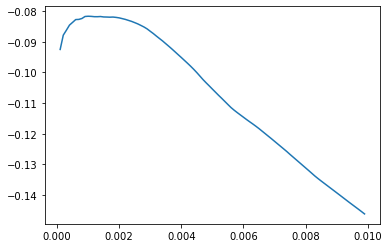

In [13]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/10000)
    lml = Lasso(alpha=(i/10000))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [14]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
9,0.001,-0.081702


In [15]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [16]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

C:\Users\khairie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\khairie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\khairie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-0.05545759802065231

In [17]:
# tune models GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)

In [18]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'mae'),
  

In [19]:
gs.best_score_

-0.05225995316159436

In [20]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=70,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [21]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)

0.18700803627329826

In [23]:
mean_absolute_error(y_test,tpred_lml)

0.12146005072191665

In [24]:
mean_absolute_error(y_test,tpred_rf)

0.08481997677119814

In [25]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

0.12878083313246108

In [26]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [27]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']


In [28]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

3.9000000000000026

In [31]:
list(X_test.iloc[1,:])

[-1,
 -1,
 0,
 1,
 0,
 0,
 0,
 0,
 3393,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0]

In [33]:
df1 = X_test

In [35]:
df1.to_csv (r'C:\Users\khairie\Documents\ds_comp_rating_proj\FlaskAPI\X_test.csv', index = False, header=True)